# NBB

## Data munging

Data munging (sometimes referred to as data wrangling) is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In [132]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [133]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [134]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

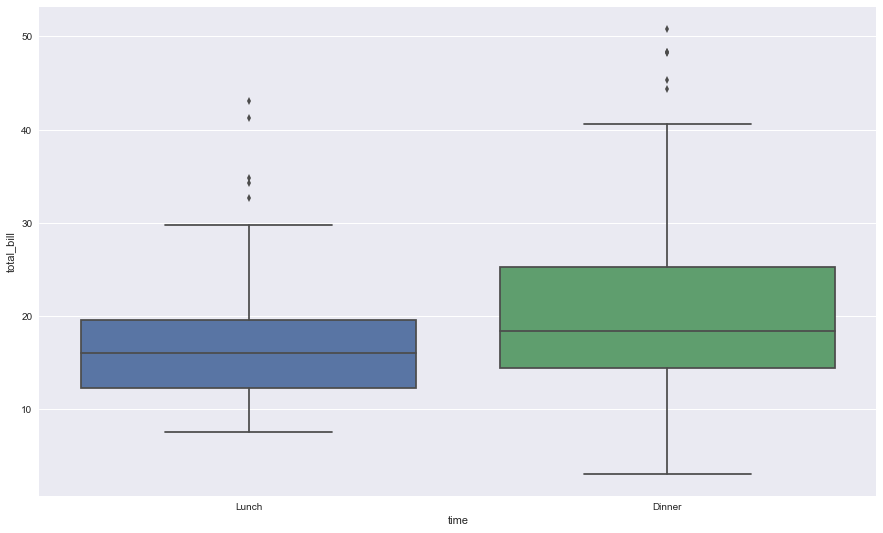

In [135]:
sns.boxplot(x="time", y="total_bill", data=tips);

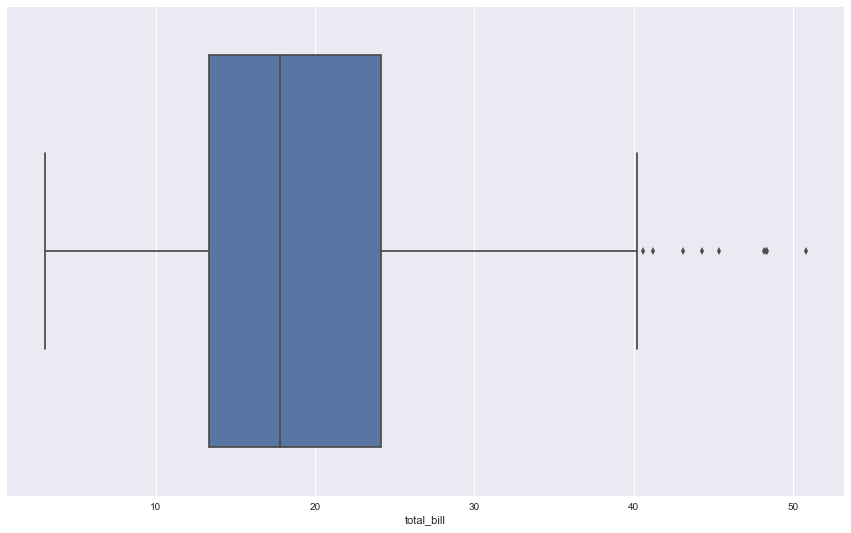

In [136]:
sns.boxplot(x=tips["total_bill"])

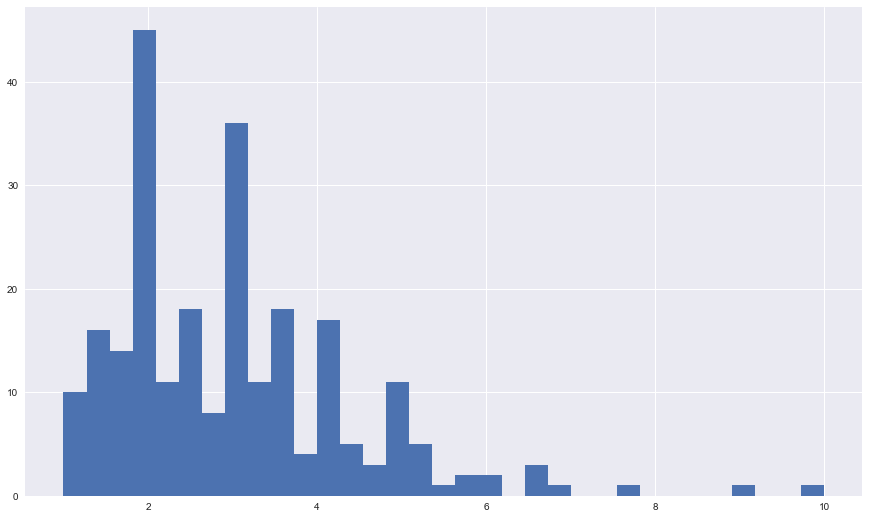

In [137]:
tips['tip'].hist(bins=33)

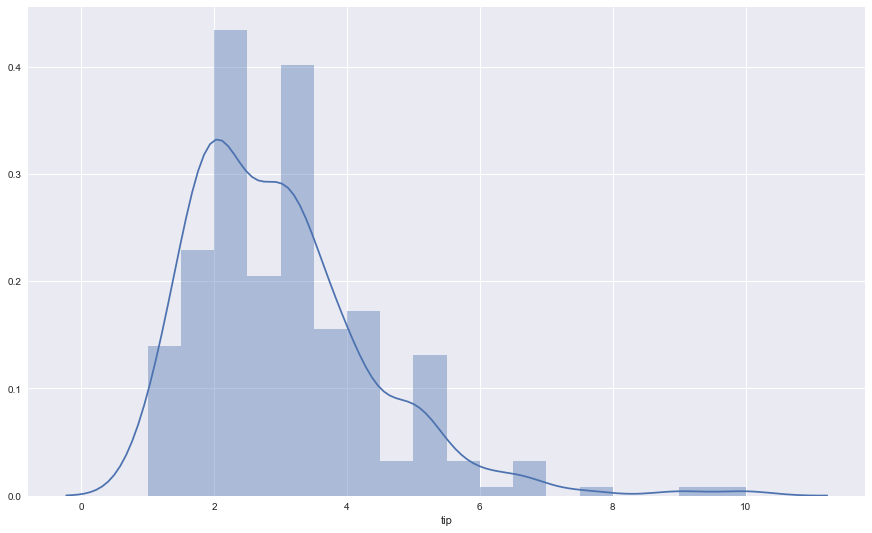

In [138]:
sns.distplot(tips['tip'])

In [139]:
dataset = load_boston()
boston =  pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Check missing values in the dataset

In [140]:
 sum(boston['NOX'].isnull()) 

0

In [141]:
boston.apply(lambda x: sum(x.isnull()),axis=0) 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Check the range of values in the dataset

In [142]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Pima Indians Diabetes Dataset

[Pima Indians Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) is known to have missing values.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices. It is a unique algorithm; see the paper for details.


Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 


Relevant Papers:

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care} (pp. 261--265). IEEE Computer Society Press.


In [143]:
pima = pd.read_csv("http://nikbearbrown.com/YouTube/MachineLearning/DATA/pima-indians-diabetes.csv", sep=',')
pima.head()

,times_pregnant,plasma_glucose,blood_pressure,triceps_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148.0,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33.0,1


In [144]:
pima.apply(lambda x: sum(x.isnull()),axis=0)

times_pregnant                 0
plasma_glucose                 2
blood_pressure                 3
triceps_skin_fold_thickness    0
serum_insulin                  1
bmi                            1
diabetes_pedigree              0
age                            2
class                          0
dtype: int64

In [145]:
pima.isnull().sum()

times_pregnant                 0
plasma_glucose                 2
blood_pressure                 3
triceps_skin_fold_thickness    0
serum_insulin                  1
bmi                            1
diabetes_pedigree              0
age                            2
class                          0
dtype: int64

In [146]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                 768 non-null int64
plasma_glucose                 766 non-null float64
blood_pressure                 765 non-null float64
triceps_skin_fold_thickness    768 non-null int64
serum_insulin                  767 non-null float64
bmi                            767 non-null float64
diabetes_pedigree              768 non-null float64
age                            766 non-null float64
class                          768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [147]:
pima.isnull().sum()

times_pregnant                 0
plasma_glucose                 2
blood_pressure                 3
triceps_skin_fold_thickness    0
serum_insulin                  1
bmi                            1
diabetes_pedigree              0
age                            2
class                          0
dtype: int64

In [148]:
(pima['serum_insulin'] == 0).sum()

374

In [149]:
(pima['serum_insulin'] < 50).sum()

411

In [150]:
pima_bak=pima.copy()

## How to fill missing values?

In [151]:
pima_bak.isnull().sum()

times_pregnant                 0
plasma_glucose                 2
blood_pressure                 3
triceps_skin_fold_thickness    0
serum_insulin                  1
bmi                            1
diabetes_pedigree              0
age                            2
class                          0
dtype: int64

In [152]:
pima_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                 768 non-null int64
plasma_glucose                 766 non-null float64
blood_pressure                 765 non-null float64
triceps_skin_fold_thickness    768 non-null int64
serum_insulin                  767 non-null float64
bmi                            767 non-null float64
diabetes_pedigree              768 non-null float64
age                            766 non-null float64
class                          768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [153]:
# drop rows with missing values
pima_bak.dropna(inplace=True)

In [154]:
pima_bak.isnull().sum()

times_pregnant                 0
plasma_glucose                 0
blood_pressure                 0
triceps_skin_fold_thickness    0
serum_insulin                  0
bmi                            0
diabetes_pedigree              0
age                            0
class                          0
dtype: int64

In [155]:
pima_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                 759 non-null int64
plasma_glucose                 759 non-null float64
blood_pressure                 759 non-null float64
triceps_skin_fold_thickness    759 non-null int64
serum_insulin                  759 non-null float64
bmi                            759 non-null float64
diabetes_pedigree              759 non-null float64
age                            759 non-null float64
class                          759 non-null int64
dtypes: float64(6), int64(3)
memory usage: 59.3 KB


In [156]:
(pima_bak['serum_insulin'] < 50).sum()

406

In [157]:
pima_bak.loc[pima_bak['serum_insulin'] < 50]

,times_pregnant,plasma_glucose,blood_pressure,triceps_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148.0,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0.0,23.3,0.672,32.0,1
5,5,116.0,74.0,0,0.0,25.6,0.201,30.0,0
7,10,115.0,0.0,0,0.0,35.3,0.134,29.0,0
9,8,125.0,96.0,0,0.0,0.0,0.232,54.0,1
10,4,110.0,92.0,0,0.0,37.6,0.191,30.0,0
11,10,168.0,74.0,0,0.0,38.0,0.537,34.0,1
12,10,139.0,80.0,0,0.0,27.1,1.441,57.0,0
15,7,100.0,0.0,0,0.0,30.0,0.484,32.0,1


In [158]:
pima_bak['serum_insulin'].loc[pima_bak['serum_insulin'] < 50]

0       0.0
1       0.0
2       0.0
5       0.0
7       0.0
9       0.0
10      0.0
11      0.0
12      0.0
15      0.0
17      0.0
21      0.0
22      0.0
23      0.0
26      0.0
29      0.0
30      0.0
33      0.0
34      0.0
36      0.0
37      0.0
38      0.0
41      0.0
42      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
       ... 
714     0.0
717     0.0
719     0.0
720     0.0
724     0.0
725     0.0
727     0.0
728     0.0
729     0.0
731     0.0
734     0.0
735     0.0
737     0.0
739     0.0
743     0.0
746     0.0
749     0.0
750     0.0
752     0.0
754     0.0
756     0.0
757     0.0
758     0.0
759     0.0
760    16.0
761     0.0
762     0.0
764     0.0
766     0.0
767     0.0
Name: serum_insulin, Length: 406, dtype: float64

In [159]:
pima_bak['serum_insulin'].mean()

79.75230566534914

In [160]:
pima_bak.head()

,times_pregnant,plasma_glucose,blood_pressure,triceps_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148.0,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33.0,1


In [161]:
pima_bak.loc[pima_bak['serum_insulin'] < 50, 'serum_insulin'] = pima_bak['serum_insulin'].mean()

In [162]:
(pima_bak['serum_insulin'] < 50).sum()

0

In [163]:
pima_bak.head()

,times_pregnant,plasma_glucose,blood_pressure,triceps_skin_fold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148.0,72.0,35,79.752306,33.6,0.627,50.0,1
1,1,85.0,66.0,29,79.752306,26.6,0.351,31.0,0
2,8,183.0,64.0,0,79.752306,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33.0,1


In [166]:
pima_bak['serum_insulin'].fillna(pima_bak['serum_insulin'].mean(), inplace=True)

## Data cleaning checklist

 * Save original data
 * Identify missing data
 * Identify placeholder data (e.g. 0's for NA's) 
 * Identify outliers
 * Check for overall plausibility and errors (e.g., typos, unreasonable ranges)
 * Identify highly correlated variables
 * Identify variables with (nearly) no variance
 * Identify variables with strange names or values
 * Check variable classes (eg. Characters vs factors)
 * Remove/transform some variables (maybe your model does not like categorial variables)
 * Rename some variables or values (if not all data is useful)
 * Check some overall pattern (statistical/ numerical summaries)
 * Possibly center/scale variables


Last update September 5, 2017